In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import matplotlib
%matplotlib inline

# Objective - simulate 5 card poker hand probablities

A deck of playing cards has 52 cards with 13 in one of four suites:
* Clubs
* Spades
* Hearts 
* Dimonds

The thirteen cards are:
* [2,3,4,5,6,7,8,9,10,J,Q,K,A]
With the high cards being: Jack, Queen, King, and Ace

We want to calculate the probablities of getting different five card poker hands using simulation.  The mathmatically calculated probablities can be found [here](https://en.wikipedia.org/wiki/Poker_probability#Frequency_of_5-card_poker_hands).

The hands we will calculate are:
* Straight Flush - five cards in order and of the same suite 
 * e.g. S8,S9,S10,SJ,SQ
* Four of a kind - four cards of the same face value 
 * e.g H9, D9, C9, S9, S2
* Full House - a three of a kind and a pair
 * e.g H4, D4, C4, D7, S7
* Straight - five cards in order
 * e.g H6, D7, C8, S9, S10
* Three of a kind -  three cards of the same value
 * e.g H9, D9, C9, D7, S2
* Two Pair - two sets of pairs
 * e.g H9, D9, C6, S6, S8
* Pair - two cards of the same value
 * e.g H9, D9, C4, S8, S2
* High Card - none of the above
 * e.g H4, D8, C10, SK, SA
 
 Below we provide some helper functions to make a deck and find the hand type given five cards.  We simplify the alogorithm by making [J, Q, K, A] have a face value of [11, 12, 13, 14].
 


In [2]:
from collections import Counter

# Helper functions to determine the kind of poker hand
hand_types = ['straight_flush', 'four_kind', 'full_house', 'flush', 'straight', 'three_kind', 'two_pair',  'pair', 'high_card']

# A card is a string '{}{}'.format(suit,face) e.g.  D10, C11, or H2
# J = 11, Q = 12, K = 13, A = 14
def get_hand_type(hand):
    faces = [ int(c[1:]) for c in hand ]
    faces.sort()
    counts = Counter(faces).most_common()
    suits = [ c[0] for c in hand ]
    
    # Boolean flags for flush and staight
    is_flush = len(Counter(suits)) == 1
    is_straight = faces == list(range(faces[0],faces[0]+5))
    
    if is_straight and is_flush:
        return 'straight_flush'
    if counts[0][1] == 4:
        return 'four_kind'
    if counts[0][1] == 3 and counts[1][1] == 2:
        return 'full_house'
    if is_flush:
        return 'flush'
    if is_straight:
        return 'straight'
    if counts[0][1] == 3:
        return 'three_kind'
    if counts[0][1] == 2 and counts[1][1] == 2:
        return 'two_pair'
    if counts[0][1] == 2:
        return 'pair'
    return 'high_card'

In [1]:
# Make a deck of all possible cards
deck = [ '{}{}'.format(suit,face) for suit in ['H','D','S','C'] for face in range(2,15) ]

# Make dict for counting hands {'flush':0, 'pair':0 ....}
def get_zero_counts():
    return Counter( {hand_type:0 for hand_type in hand_types} )



In [10]:
hand = np.random.choice(deck, 5)
print(hand)
get_zero_counts()
counts = get_zero_counts()
counts[get_hand_type(hand)] +=1
counts

['H13' 'S6' 'C13' 'D12' 'H5']


Counter({'flush': 0,
         'four_kind': 0,
         'full_house': 0,
         'high_card': 0,
         'pair': 1,
         'straight': 0,
         'straight_flush': 0,
         'three_kind': 0,
         'two_pair': 0})

In [12]:
print(simulate_hands())

Counter({'high_card': 49, 'pair': 37, 'three_kind': 6, 'two_pair': 4, 'four_kind': 1, 'full_house': 1, 'flush': 1, 'straight': 1, 'straight_flush': 0})


 # Task
 * Complete the simulate hands function which returns a dictionary with the frequancy of each hand.
  * Hint: use [np.random.choice](https://docs.scipy.org/doc/numpy/reference/routines.random.html) to select a hand from the deck.
 * Test this function on a few small n values.
 * Make histograms showing the frequence for 10, 100, 1000, and 10,000 hands.
  * Hint: aim to make a DataFrame with the index as n and columns for hand counts.
  * Hint: make multiple axis in one figure with: `fig , ax = plt.subplots(2,2,figsize=(10,10),sharey='all', sharex='all')`
 
 
 You should work in groups of 2 - 3 for this.  **If your group makes four correct histograms (with an axis title on each) you will get bonus XP).**

In [11]:
def simulate_hands(n=100):
    counts = get_zero_counts()
    for i in range(0,n):
        hand = np.random.choice(deck, 5)
        counts[get_hand_type(hand)] +=1
    # return a dictionary of counts after selection n random hands
    return counts # Delete this and return a dictonary of hand counts.
        

In [36]:
# Make your data frame here
df = pd.DataFrame([simulate_hands(10),simulate_hands(100),simulate_hands(1000),simulate_hands(10000)],index=[10,100,1000,10000])


df # display df

,flush,four_kind,full_house,high_card,pair,straight,straight_flush,three_kind,two_pair
10,0,0,0,5,4,0,0,1,0
100,0,0,2,38,50,0,0,2,8
1000,3,2,3,380,480,5,0,48,79
10000,44,22,42,4071,4612,33,0,463,713


In [37]:
# make a df_normalized with percents in each row
df_normalized.iloc[0] = df.iloc[0]*100/10
df_normalized.iloc[1] = df.iloc[1]*100/100
df_normalized.iloc[2] = df.iloc[2]*100/1000
df_normalized.iloc[3] = df.iloc[3]*100/10000

df_normalized # display normalized df

,flush,four_kind,full_house,high_card,pair,straight,straight_flush,three_kind,two_pair
10,0.00,0.00,0.00,50.00,40.00,0.00,0.0,10.00,0.00
100,0.00,0.00,2.00,38.00,50.00,0.00,0.0,2.00,8.00
1000,0.30,0.20,0.30,38.00,48.00,0.50,0.0,4.80,7.90
10000,0.44,0.22,0.42,40.71,46.12,0.33,0.0,4.63,7.13


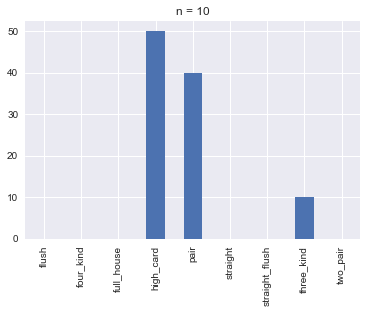

In [46]:
# Make your histograms here.

plot1 = df_normalized.iloc[0].plot(kind='bar')
plot1.set_title('n = 10')


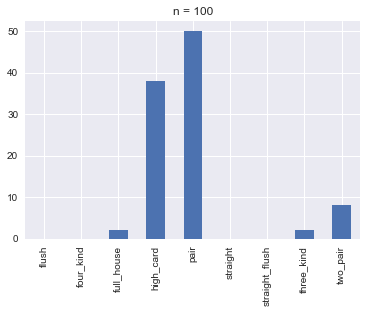

In [45]:
plot2 = df_normalized.iloc[1].plot(kind='bar')
plot2.set_title('n = 100')

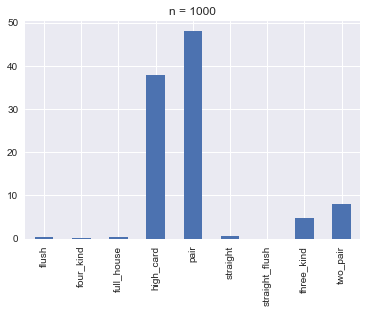

In [44]:
plot3 = df_normalized.iloc[2].plot(kind='bar')
plot3.set_title('n = 1000')

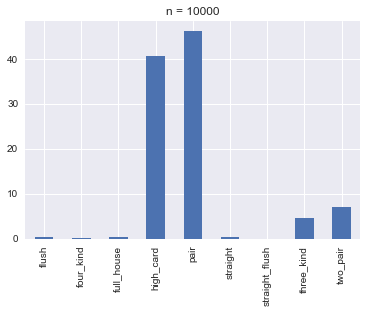

In [43]:
plot4 = df_normalized.iloc[3].plot(kind='bar')
plot4.set_title('n = 10000')